<a href="https://colab.research.google.com/github/ocerino/PersonalProjects/blob/main/ServiceNow_Ticket_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install tabula-py

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.0/12.0 MB 89.1 MB/s eta 0:00:00


In [ ]:
from google.colab import files
from google.colab import drive
drive.mount('/content/drive')
uploaded = files.upload()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
    !ls "/content/drive/My Drive/Personal Projects/"

Cleaned_Ticket_Data.txt  Data_Conversion.ipynb


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tabula


input_file = '/content/drive/My Drive/Personal Projects/Cleaned_Ticket_Data.txt'
output_file = '/content/drive/My Drive/Personal Projects/Cleaned_Ticket_Data.csv'

# For delimited files:
df = pd.read_csv(input_file, sep=',') # Use sep=',' for comma-separated, sep='\s+' for one or more spaces, sep="\t' for tab"
df.to_csv(output_file, index=False)

# For fixed-width files:
# df = pd.read_fwf(input_file, colspecs=[(0, 5), (6, 10)], header=None) # Define column start and end positions
# df.to_csv(output_file, index=False, header=['Column1', 'Column2']) # Add headers if needed

#Using CSV file create dataframe to perform data analysis on
df_cleaned_ticket_data = pd.read_csv(output_file, header=[0])
df_cleaned_ticket_data.head()

,Ticket Number,Short Description,Created By,Assigned To,Assignment Group,Service Offering,Action/Symptom,Knowledge Article
0,INC2324543,spreadsheet client is locked out of/ problem w...,oscar.cerino@asd-usa.com,Oscar Cerino,Hexagon ProMedica First Call,Mapped Drives - S Drive (Public),Permission Issue,KB0018109 v26.0
1,INC2324706,MFA isn't coming up,oscar.cerino@asd-usa.com,Oscar Cerino,Hexagon ProMedica First Call,Active Directory,MFA Enroll,KB0019477 v40.0
2,INC2324859,new employee setup,oscar.cerino@asd-usa.com,Tameka Baker,Hexagon ProMedica Mobile Device Support,Mobile Device Troubleshooting,New Device Setup,KB0020846 v11.0
3,INC2325380,laptop not working won't boot,oscar.cerino@asd-usa.com,1009734 - Ryan Reid,#Corp - Desktop Hickman,Laptop,Basic Troubleshooting,KB0020923 v5.0
4,INC2325413,second screen won't come on,oscar.cerino@asd-usa.com,1001795 - Cyril Day,#Corp - Desktop PPG & PCS,Workstations - Monitor,(empty),KB0020923 v5.0


In [ ]:
df_cleaned_ticket_data.describe()

,Ticket Number,Short Description,Created By,Assigned To,Assignment Group,Service Offering,Action/Symptom,Knowledge Article
count,2847,2847,2847,2847,2847,2847,2847,2847
unique,2819,2041,63,243,100,218,131,825
top,INC2765418,Security,oscar.cerino@asd-usa.com,Oscar Cerino,Hexagon ProMedica General Tier 2 Support,Active Directory,(empty),KB0012123 v28.0
freq,2,86,2383,2182,1457,706,554,70


In [ ]:
df_no_duplicates = df_cleaned_ticket_data.drop_duplicates(subset=['Ticket Number'], inplace=False)
df_no_duplicates.head()

,Ticket Number,Short Description,Created By,Assigned To,Assignment Group,Service Offering,Action/Symptom,Knowledge Article
0,INC2324543,spreadsheet client is locked out of/ problem w...,oscar.cerino@asd-usa.com,Oscar Cerino,Hexagon ProMedica First Call,Mapped Drives - S Drive (Public),Permission Issue,KB0018109 v26.0
1,INC2324706,MFA isn't coming up,oscar.cerino@asd-usa.com,Oscar Cerino,Hexagon ProMedica First Call,Active Directory,MFA Enroll,KB0019477 v40.0
2,INC2324859,new employee setup,oscar.cerino@asd-usa.com,Tameka Baker,Hexagon ProMedica Mobile Device Support,Mobile Device Troubleshooting,New Device Setup,KB0020846 v11.0
3,INC2325380,laptop not working won't boot,oscar.cerino@asd-usa.com,1009734 - Ryan Reid,#Corp - Desktop Hickman,Laptop,Basic Troubleshooting,KB0020923 v5.0
4,INC2325413,second screen won't come on,oscar.cerino@asd-usa.com,1001795 - Cyril Day,#Corp - Desktop PPG & PCS,Workstations - Monitor,(empty),KB0020923 v5.0


In [ ]:
df_no_duplicates.describe()

,Ticket Number,Short Description,Created By,Assigned To,Assignment Group,Service Offering,Action/Symptom,Knowledge Article
count,2819,2819,2819,2819,2819,2819,2819,2819
unique,2819,2041,63,243,100,218,131,825
top,INC2759153,Security,oscar.cerino@asd-usa.com,Oscar Cerino,Hexagon ProMedica General Tier 2 Support,Active Directory,(empty),KB0012123 v28.0
freq,1,86,2360,2156,1432,694,547,70


In [ ]:
df_no_duplicates.to_csv('/content/drive/My Drive/Personal Projects/Cleaned_Ticket_Data_No_Duplicates.csv', index=False)

In [ ]:
df_top_10_SO_values = df_no_duplicates['Service Offering'].value_counts().head(10)
df_top_10_SO_values.head()

,count
Service Offering,
Active Directory,694
MyTime,145
Workstations,131
Mobile Device Troubleshooting,127
EPIC - Provide How-To Information,91


In [ ]:
df_top_10_SO_values.describe()

,count
count,10.000000
mean,154.800000
std,191.930427
min,55.000000
25%,70.000000
50%,90.500000
75%,130.000000
max,694.000000


<Axes: xlabel='Service Offering'>

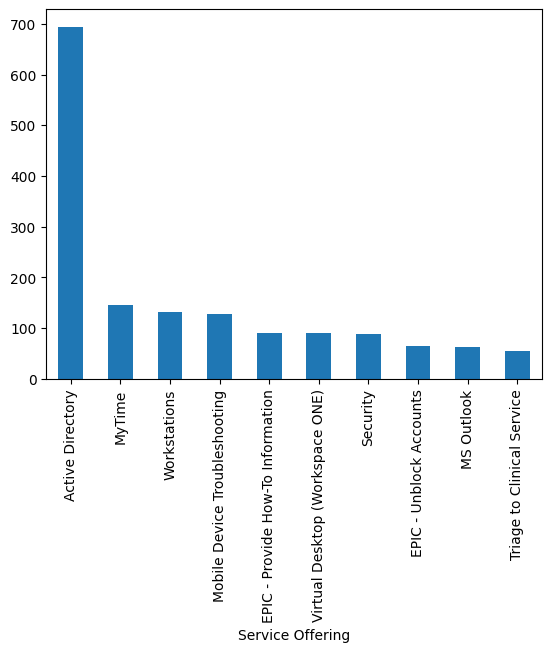

In [ ]:
df_top_10_SO_values.plot.bar()

<Axes: ylabel='count'>

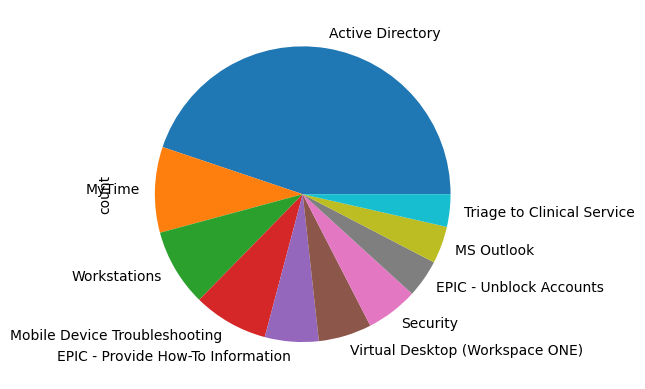

In [ ]:
df_top_10_SO_values.plot.pie()

In [ ]:
df_top_10_AS_values = df_no_duplicates['Action/Symptom'].value_counts().head(10)
df_top_10_AS_values.head()

,count
Action/Symptom,
(empty),547
Other,296
Account Disabled,243
Provide How-To Information,233
Assist With Login,188


In [ ]:
df_top_10_AS_values.describe()

,count
count,10.000000
mean,207.000000
std,141.144528
min,66.000000
25%,111.250000
50%,185.500000
75%,240.500000
max,547.000000


<Axes: xlabel='Action/Symptom'>

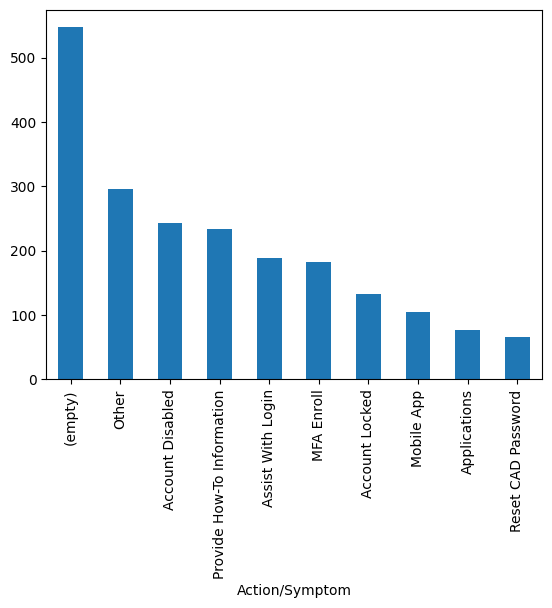

In [ ]:
df_top_10_AS_values.plot.bar()

<Axes: ylabel='count'>

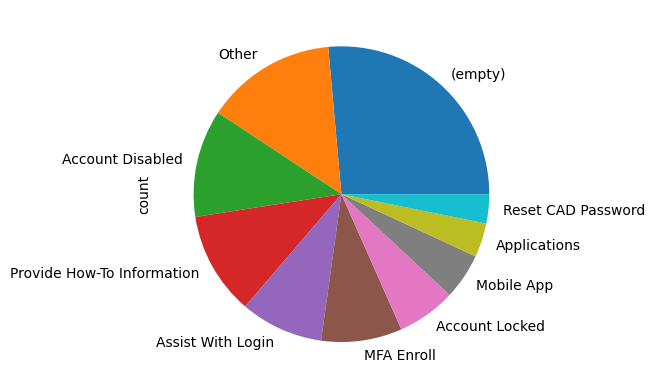

In [ ]:
df_top_10_AS_values.plot.pie()

In [ ]:
df_top_10_CB_values = df_no_duplicates['Created By'].value_counts().head(10)
df_top_10_CB_values.head()

,count
Created By,
oscar.cerino@asd-usa.com,2360
idr.system,206
mhuguley,17
bryan.underwood@asd-usa.com,12
matthew.griffin@asd-usa.com,11


In [ ]:
df_top_10_CB_values.describe()

,count
count,10.000000
mean,265.600000
std,738.441181
min,9.000000
25%,10.000000
50%,11.000000
75%,15.750000
max,2360.000000


<Axes: xlabel='Created By'>

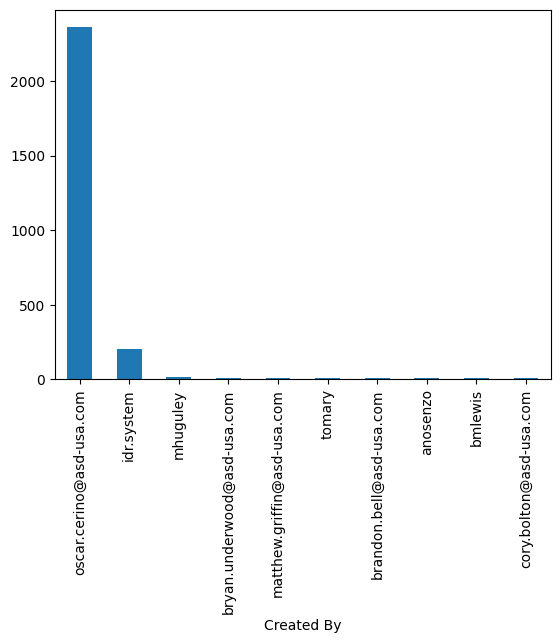

In [ ]:
df_top_10_CB_values.plot.bar()

<Axes: ylabel='count'>

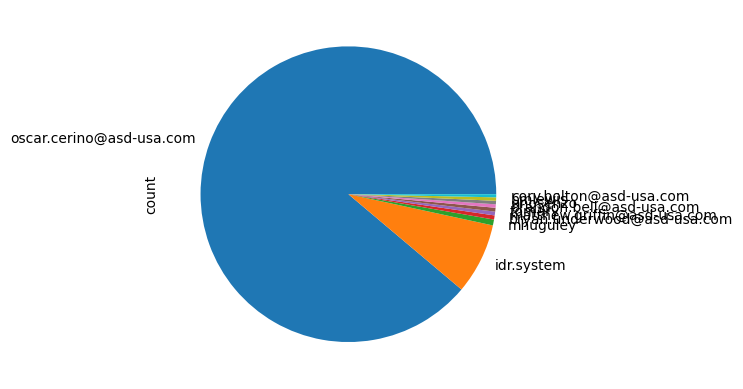

In [ ]:
df_top_10_CB_values.plot.pie()

In [ ]:
df_top_10_AT_values = df_no_duplicates['Assigned To'].value_counts().head(10)
df_top_10_AT_values.head()

,count
Assigned To,
Oscar Cerino,2156
111633 - Molly Quinlan,14
1048507 - Mark Piorkowski,14
737635 - Damon Smith,12
Christopher Hixon,11


In [ ]:
df_top_10_AT_values.describe()

,count
count,10.000000
mean,225.400000
std,678.346552
min,9.000000
25%,9.000000
50%,11.000000
75%,13.500000
max,2156.000000


<Axes: xlabel='Assigned To'>

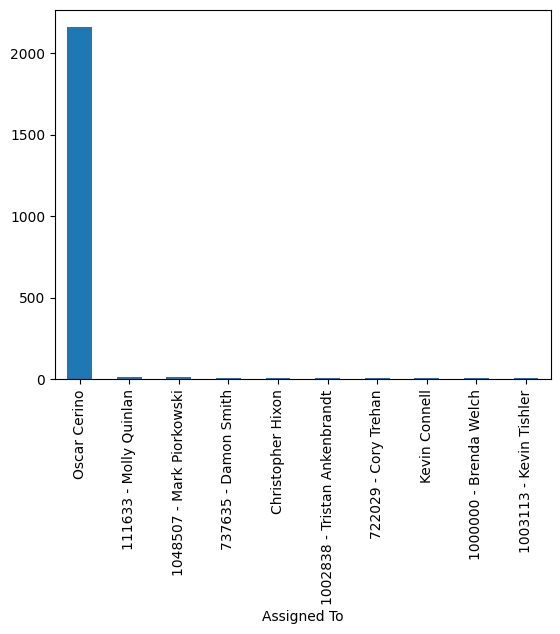

In [ ]:
df_top_10_AT_values.plot.bar()

<Axes: ylabel='count'>

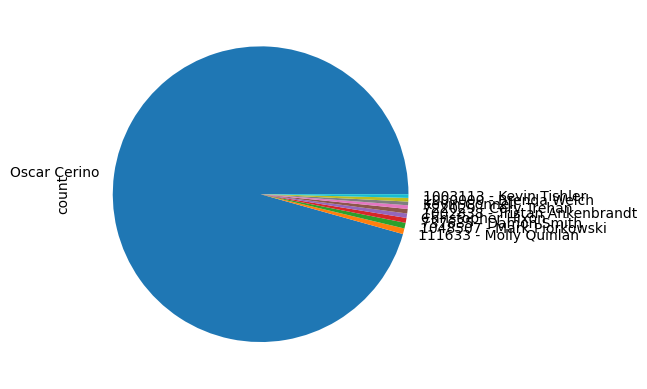

In [ ]:
df_top_10_AT_values.plot.pie()